# Prototypes and Criticisms

In [1]:
import logging
import numpy as np
import seaborn as sn
import config
import matplotlib.pyplot as plt
import pandas as pd
import sloth
logger = logging.getLogger('sloth')
logger.setLevel(level=logging.DEBUG)

pd.set_option('display.max_colwidth', None)

sn.set_style("whitegrid")

%matplotlib inline
%load_ext autoreload
%autoreload 2


def plot_data(task):
    selection = task.x[validation_task.y_pred,:]
    plt.plot(selection[:,0], selection[:,1],'o', label='True')
    selection = task.x[~task.y_pred,:]
    plt.plot(selection[:,0], selection[:,1],'o', label='False')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()

/home/doeltz/doeltz/development/RiVaPy/rivapy/__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')


## Prototypes and Criticisms with Maximum Mean Discrepancy

In [64]:
validation_task = sloth.datasets.test_sets.simple_classification_ordinal(n_samples=1_000, x=3, f=0)
mmd_params = sloth.MMD_Parameter(n_prototypes=20, n_criticisms=5, metric='rbf', witness_penalty=10000.0,
                                 **{'gamma': 0.10})
mmd = sloth.MMD(mmd_params)
pc = mmd.compute_prototypes(validation_task)

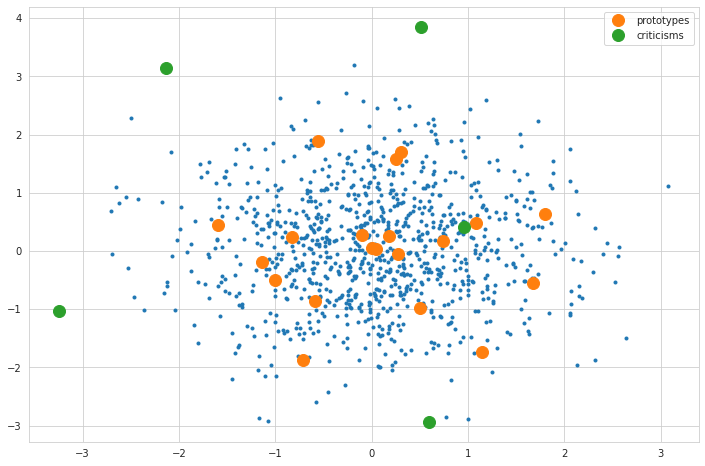

In [65]:
plt.figure(figsize=(12,8))
plt.plot(validation_task.x[:,0], validation_task.x[:,1],'.')
plt.plot(validation_task.x[pc['prototypes'],0], validation_task.x[pc['prototypes'],1], 'o', markersize=12, label='prototypes')
plt.plot(validation_task.x[pc['criticisms'],0], validation_task.x[pc['criticisms'],1], 'o', markersize=12, label='criticisms')
plt.legend();

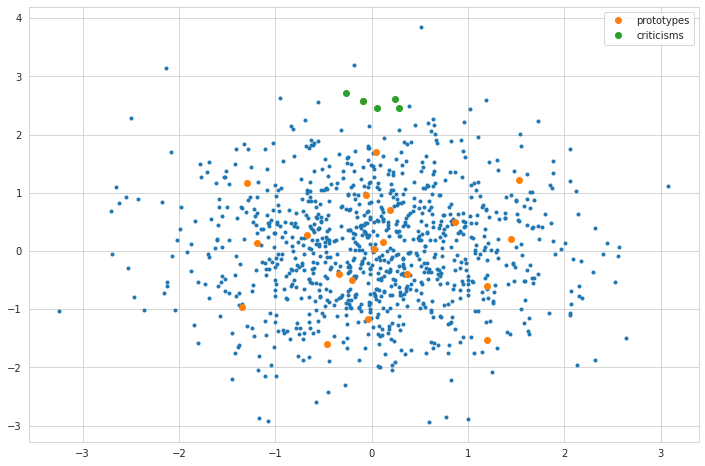

In [50]:
plt.figure(figsize=(12,8))
plt.plot(validation_task.x[:,0], validation_task.x[:,1],'.')
plt.plot(validation_task.x[pc['prototypes'],0], validation_task.x[pc['prototypes'],1], 'o', label='prototypes')
plt.plot(validation_task.x[pc['criticisms'],0], validation_task.x[pc['criticisms'],1], 'o', label='criticisms')
plt.legend();